# **Peng Robindon EOS**

## **Water at 300K and 2atm:**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.constants 
import warnings

warnings.filterwarnings("ignore")

def peng_robinson(T, P, Tc, Pc, ω):
    
    # Constants
    R = scipy.constants.R # J/(mol*K)
    Tr = T/Tc
    Pr = P/Pc

    α = (1 + (1-Tr**1/2)* (0.37464 + 1.54226*ω - 0.26992* (ω**2)))**2
    a = 0.45724 * α * (R*Tc)**2 / Pc
    b = 0.07780 * R * Tc / Pc

    coef1 = 1
    coef2 = (b - R*T/P)
    coef3 = (a/P - 3*b**2 - 2*b*R*T/P)
    coef4 = (b**3 + (b**2*R*T - a*b)/P)

    # 0 = coef1*v_bar**3 + coef2*v_bar**2 + coef3*v_bar + coef4
    roots = np.roots([coef1, coef2, coef3, coef4])
    coeff = [coef1, coef2, coef3, coef4]
    return roots


# Data from the book (water)
Tc_water = 647.14        #K
Pc_water = 220.64 * 1e5  #Pa
ω_water = 0.344     

# Operational Conditions
T = 300 #K
P = 2 * 1e5 # bar to Pa

sol = peng_robinson(T, P, Tc_water, Pc_water, ω_water)
real_roots =[float(root) for root in sol if np.isreal(root) and root > 0]
print(f"liquid phase molar volume: {min(real_roots):.3e} m3/mol")
print(f"vapor phase molar volume: {max(real_roots):.3e} m3/mol")


liquid phase molar volume: 2.018e-05 m3/mol
vapor phase molar volume: 1.178e-02 m3/mol


## **Propane Concentraction at 220K - 500K and 1.5 bar:**

In [6]:
# Data for propane
T_propane = [220, 500]  
P_propane = np.array([1.5, 1.5]) * 1e5 # bar to Pa

Tc_propane = 369.83 #   K
Pc_propane =  4248  *1e3 #pa
ω_propane = 0.152

storage = []
for i in [0, 1]:
    T = T_propane[i]
    P = P_propane[i]
    sol = peng_robinson(T, P, Tc_propane, Pc_propane, ω_propane)
    real_roots = [float(root) for root in sol if np.isreal(root) and root > 0]
    liquid_phase = min(real_roots)
    vapor_phase = max(real_roots)
    storage.append([T, P, liquid_phase, vapor_phase])


df = pd.DataFrame(storage, columns=['T(K)', 'P(Pa)', 'Liquid Phase (m3/mol)', 'Vapor Phase (m3/mol)'])
df['Liquid Phase (m3/mol)'] = df['Liquid Phase (m3/mol)'].apply(lambda x: float(f"{x:.3e}"))
df['Vapor Phase (m3/mol)'] = df['Vapor Phase (m3/mol)'].apply(lambda x: float(f"{x:.3e}"))

print(f"The liquid phase volume at 220 K and 1.5 bar is {df['Liquid Phase (m3/mol)'][0]} m3/mol")
print(f"The vapor phase volume at 500 K and 1.5 bar is {df['Vapor Phase (m3/mol)'][1]} m3/mol")

The liquid phase volume at 220 K and 1.5 bar is 6.34e-05 m3/mol
The vapor phase volume at 500 K and 1.5 bar is 0.02742 m3/mol


### **Comparison with literature (NIST):**

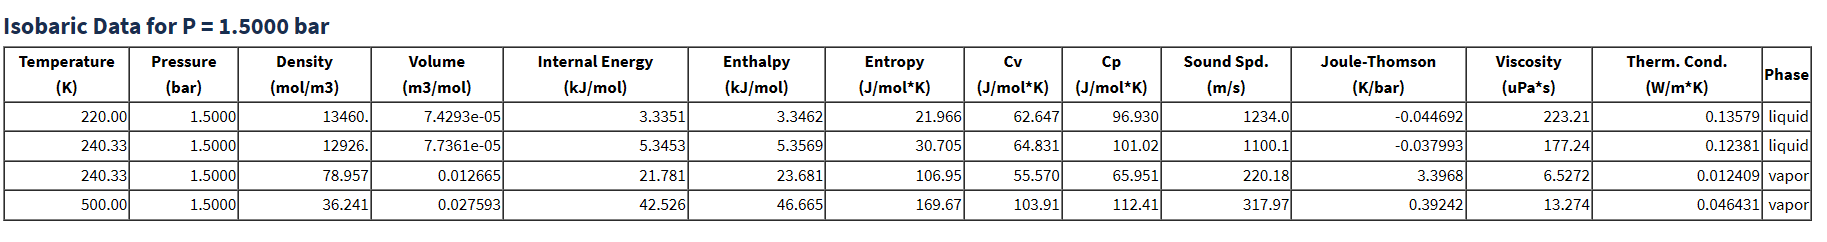

The differences are due to the equations of state chosen: Here we are using Peng-Robinson, a good equation of state, however, NIST uses the latest and most reliable
equations of state.